In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import shape
import numpy as np
import matplotlib.colors as mcolors

In [3]:
# read csv
data = pd.read_csv('merged_data.csv')
epa_data = data[['CensusTract','Year','State','County','Pollutant Name','Total Cancer Risk (per million)']]

# remove rows with NaN values
epa_data = epa_data.dropna()


In [4]:
# get county average cancer risk
county_avg = epa_data.groupby(['County','Year'])['Total Cancer Risk (per million)'].mean().reset_index()

# Pivot the DataFrame to have years as columns
pivot_df = county_avg.pivot(index='County', columns='Year', values='Total Cancer Risk (per million)')

display(pivot_df)

Year,2014,2017,2018,2019
County,,,,
Beaver,15.558540,10.394641,8.436222,9.391443
Box Elder,16.034662,11.848440,9.714514,9.960403
Cache,15.518565,11.722657,9.428556,10.385825
Carbon,16.066200,12.037988,10.965828,10.595624
Daggett,11.123528,8.474601,7.742327,8.159097
Davis,20.575631,19.107604,14.388571,13.002453
Duchesne,15.915934,15.849658,16.931538,14.183727
Emery,14.031526,9.757352,8.598629,8.927183
Garfield,12.991627,12.554399,7.679736,8.578414


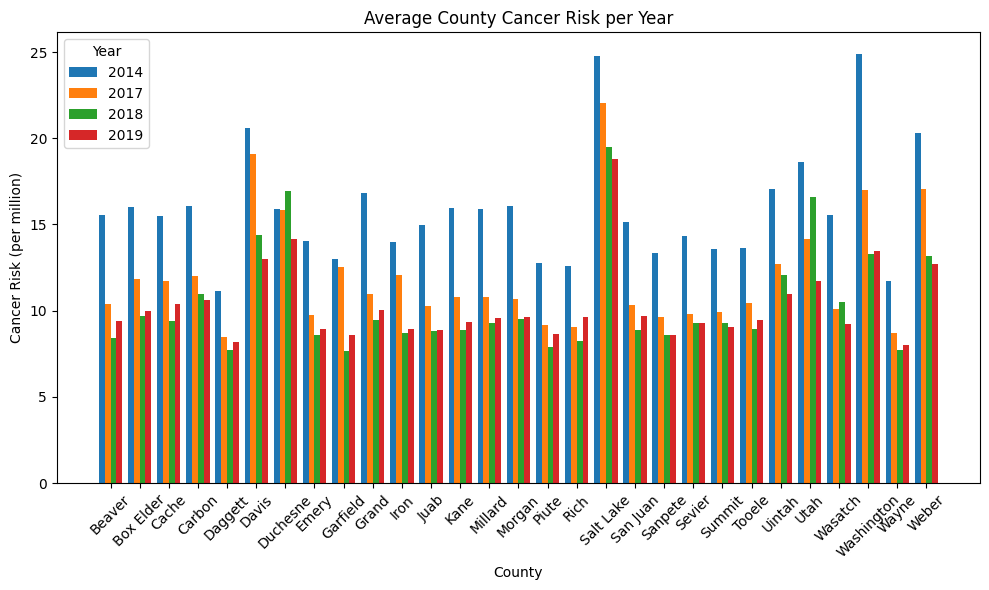

In [5]:

# Plotting
bar_width = 0.2
index = np.arange(len(pivot_df.index))
fig, ax = plt.subplots(figsize=(10, 6))
bar_2014 = ax.bar(index - 3 * bar_width / 2, pivot_df[2014], bar_width, label='2014')
bar_2017 = ax.bar(index - bar_width / 2, pivot_df[2017], bar_width, label='2017')
bar_2018 = ax.bar(index + bar_width / 2, pivot_df[2018], bar_width, label='2018')
bar_2019 = ax.bar(index + 3 * bar_width / 2, pivot_df[2019], bar_width, label='2019')

ax.set_title('Average County Cancer Risk per Year')
ax.set_xlabel('County')
ax.set_ylabel('Cancer Risk (per million)')
ax.set_xticks(index)
ax.set_xticklabels(pivot_df.index)
ax.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_56676/3256859373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epa_data2019['CensusTract'] = epa_data2019['CensusTract'].astype(str)


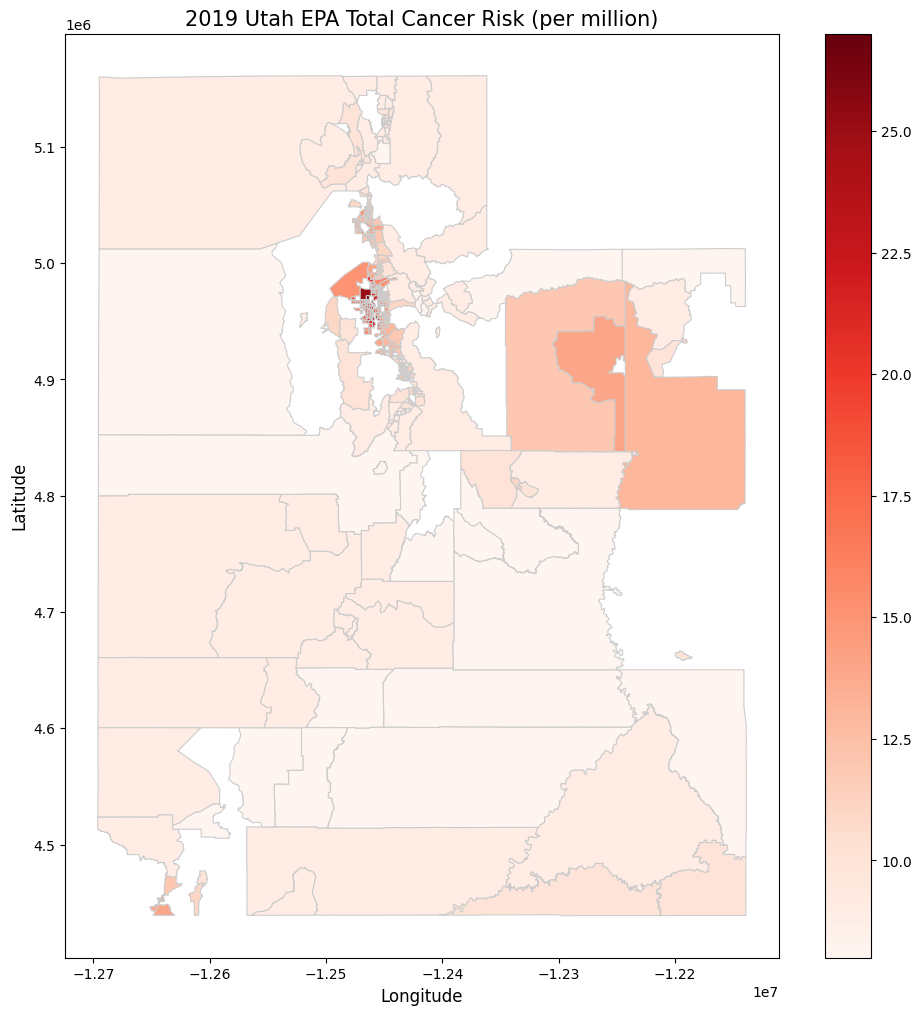

In [7]:
# Load the GeoJSON file
geojson = gpd.read_file('CensusTracts2020.geojson')
geojson = geojson.rename(columns={'GEOID20':'CensusTract'})

# filter 2019 epa data
epa_data2019 = epa_data[epa_data['Year'] == 2019]

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
epa_data2019['CensusTract'] = epa_data2019['CensusTract'].astype(str)

# Merge the data on the GEOID column
geo_merged = geojson.merge(epa_data2019, on='CensusTract', how='left')

#remove nan values
geo_merged = geo_merged.dropna()

# Convert to int
geo_merged['Total Cancer Risk (per million)'] = geo_merged['Total Cancer Risk (per million)'].astype(int)

# Normalize cancer risk for color mapping and plot
norm = mcolors.Normalize(vmin=geo_merged['Total Cancer Risk (per million)'].min(), vmax=geo_merged['Total Cancer Risk (per million)'].max())
mapper = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

# Plot using GeoPandas built-in plot function
fig, ax = plt.subplots(figsize=(12, 12))
geo_merged.plot(column='Total Cancer Risk (per million)', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('2019 Utah EPA Total Cancer Risk (per million)', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.show()